In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
full_music_data=pd.read_csv('full_music_data.csv')
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me


In [3]:
influence_data=pd.read_csv('influence_data.csv')
influence_data.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [4]:
full_music_data.shape

(98340, 19)

In [5]:
influence_data['influencer_main_genre'].unique()

array(['Pop/Rock', 'Electronic', 'Reggae', 'Jazz', 'Country',
       'Comedy/Spoken', 'R&B;', 'Classical', 'Latin', 'Vocal', 'Folk',
       'Easy Listening', 'International', 'Avant-Garde', 'Blues',
       'Stage & Screen', 'New Age', 'Religious', "Children's", 'Unknown'],
      dtype=object)

In [6]:
data_map={}
for i in influence_data['influencer_name'].unique():
    data_map[i]=influence_data[influence_data['influencer_name']==i].iloc[0,2]

In [7]:
import numpy as np
def getinfluencer_main_genre(x):
    x=eval(x)
    if len(x)==1:
        try:
            return data_map[x[0]]
        except:
            return np.NaN
    else:
        return np.NaN
full_music_data['genre']=full_music_data['artist_names'].apply(lambda x :getinfluencer_main_genre(x))

In [8]:
full_music_data.isnull().sum()

artist_names                 0
artists_id                   0
danceability                 0
energy                       0
valence                      0
tempo                        0
loudness                     0
mode                         0
key                          0
acousticness                 0
instrumentalness             0
liveness                     0
speechiness                  0
explicit                     0
duration_ms                  0
popularity                   0
year                         0
release_date                 0
song_title (censored)        0
genre                    18619
dtype: int64

In [9]:
full_music_data.dropna(inplace=True)

In [10]:
full_music_data.isnull().sum()

artist_names             0
artists_id               0
danceability             0
energy                   0
valence                  0
tempo                    0
loudness                 0
mode                     0
key                      0
acousticness             0
instrumentalness         0
liveness                 0
speechiness              0
explicit                 0
duration_ms              0
popularity               0
year                     0
release_date             0
song_title (censored)    0
genre                    0
dtype: int64

In [11]:
full_music_data.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie,Electronic
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye,Electronic
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft,Electronic
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man,R&B;
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me,R&B;


In [33]:
full_music_data['artists_id']=full_music_data['artists_id'].apply(lambda x:str(eval(x)[0]))

In [13]:
full_music_data.shape

(79721, 20)

In [12]:
full_music_data.columns

Index(['artist_names', 'artists_id', 'danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity',
       'year', 'release_date', 'song_title (censored)', 'genre'],
      dtype='object')

In [41]:
full_music_data_temp=full_music_data[['genre','song_title (censored)','artists_id', 'year','danceability', 'energy', 'valence',
       'tempo', 'loudness', 'mode', 'key', 'acousticness', 'instrumentalness',
       'liveness', 'speechiness', 'explicit', 'duration_ms', 'popularity'
       ]]

In [42]:
full_music_data_temp

,genre,song_title (censored),artists_id,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity
0,Electronic,Ernie,178301,2005,0.600,0.365,0.131,130.046,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54
1,Electronic,Wandering Eye,178301,2005,0.874,0.326,0.179,119.620,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53
2,Electronic,The Raft,178301,2009,0.670,0.531,0.336,139.385,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55
3,R&B;,All True Man,625201,1991,0.761,0.702,0.850,104.773,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34
4,R&B;,(What Can I Say) To Make You Love Me,625201,1987,0.661,0.828,0.902,115.078,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98335,Pop/Rock,Jailhouse Rock - **** Remaster,690254,1975,0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33
98336,Pop/Rock,It's Only Love,690254,1976,0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32
98337,Pop/Rock,Balinese,690254,1987,0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31
98338,Pop/Rock,La Grange - **** Remaster,690254,1992,0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43


In [83]:
full_music_data_temp.groupby(['genre']).mean().to_csv('full_music_data_by_genre.csv')

In [82]:
full_music_data_temp.groupby(['genre']).mean()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity
genre,,,,,,,,,,,,,,,
Avant-Garde,1973.155556,0.485171,0.381955,0.425820,109.405444,-17.191533,0.733333,5.133333,0.595895,0.471671,0.162571,0.089229,0.000000,357496.333333,27.800000
Blues,1964.224307,0.573729,0.441169,0.654099,117.547470,-11.582060,0.766756,5.031278,0.633049,0.087271,0.205332,0.065081,0.001787,214368.610366,22.748883
Children's,1961.193548,0.673452,0.485419,0.752452,127.675032,-7.671871,0.870968,4.516129,0.745806,0.016532,0.299248,0.091252,0.000000,124637.612903,12.387097
Classical,1957.311550,0.337187,0.178196,0.333526,106.365124,-19.651097,0.764944,4.901216,0.943426,0.520387,0.194112,0.065347,0.000000,293987.258865,12.368288
Comedy/Spoken,1971.689420,0.548792,0.547730,0.464901,104.335604,-14.545300,0.788396,5.177474,0.819165,0.002909,0.632603,0.683727,0.204778,219255.296928,19.877133
Country,1982.003824,0.587735,0.479450,0.605054,119.318436,-10.912017,0.935946,5.363289,0.485707,0.028978,0.186954,0.045860,0.002549,192600.992670,34.003505
Easy Listening,1960.177979,0.426564,0.334962,0.403355,111.049270,-14.834189,0.701357,4.886878,0.707876,0.505421,0.169760,0.044161,0.000000,175005.595777,16.984917
Electronic,1998.497506,0.592636,0.643846,0.426186,119.486914,-10.159002,0.562344,5.410224,0.221043,0.438390,0.201389,0.075913,0.056110,294835.463840,47.574813
Folk,1967.969357,0.529885,0.279700,0.522296,115.621300,-15.022456,0.797459,5.117339,0.750065,0.072986,0.183185,0.064523,0.000000,194719.263827,23.991779


In [19]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=1)   #降到2维
pca.fit(full_music_data_temp.groupby('year').mean().values)                  #训练
newX=pca.fit_transform(full_music_data_temp.groupby('year').mean().values)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)  #输出贡献率
print(newX)                  #输出降维后的数据

[0.99999966]


In [21]:
newX.shape

(98, 1)

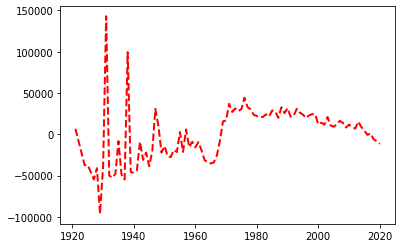

In [26]:
plt.plot(full_music_data_temp.groupby('year').mean().index.tolist(),newX,color='red',linewidth=2.0,linestyle='--')

In [46]:
full_music_data_temp.to_csv('full_music_data_temp.csv',index=None)

In [49]:
influence_data[influence_data['influencer_name']=='The Beatles']

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
67,754032,The Beatles,Pop/Rock,1960,1098,Soundgarden,Pop/Rock,1980
106,754032,The Beatles,Pop/Rock,1960,2330,Sergio Mendes,Easy Listening,1960
117,754032,The Beatles,Pop/Rock,1960,2411,Tangerine Dream,Electronic,1960
154,754032,The Beatles,Pop/Rock,1960,3595,Andrew Lloyd Webber,Stage & Screen,1960
264,754032,The Beatles,Pop/Rock,1960,5501,System of a Down,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42126,754032,The Beatles,Pop/Rock,1960,2854537,Harry Styles,Pop/Rock,2010
42147,754032,The Beatles,Pop/Rock,1960,2872922,Mac DeMarco,Pop/Rock,2000
42262,754032,The Beatles,Pop/Rock,1960,3065843,Lukas Graham,Pop/Rock,2010
42677,754032,The Beatles,Pop/Rock,1960,3462983,Levitation Room,Pop/Rock,2010


In [73]:
wico=[full_music_data_temp[full_music_data_temp['artists_id']=='754032'].mean().tolist()[1:]]

for i in influence_data[influence_data['influencer_name']=='The Beatles']['follower_id'].unique():
    wico.append(full_music_data_temp[full_music_data_temp['artists_id']==str(i)].mean().tolist()[1:])
    
    

In [76]:
pd.DataFrame(wico).iloc[:,:-2].dropna().to_csv('full_music_data_temp.csv',index=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1972.163415,0.521302,0.546520,0.620889,121.067988,-9.684463,0.819512,4.446341,0.360337,0.051928,0.223417,0.053451,0.000000,174243.712195,48.075610
1,1993.048387,0.367032,0.820403,0.400423,128.162855,-7.037161,0.677419,5.129032,0.017231,0.174349,0.184169,0.052542,0.016129,281648.661290,41.709677
2,1980.666667,0.621667,0.480750,0.629333,127.384833,-12.689583,0.666667,6.416667,0.541392,0.233957,0.162167,0.044183,0.000000,241372.250000,36.000000
3,1976.111111,0.258556,0.392633,0.133778,123.450889,-16.867778,0.222222,4.444444,0.772556,0.806444,0.178489,0.066589,0.000000,741828.333333,32.333333
4,1987.409836,0.404541,0.311058,0.291897,106.037426,-14.964541,0.868852,4.557377,0.721264,0.049177,0.247961,0.113115,0.000000,249000.508197,36.770492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1973.583333,0.530000,0.585458,0.650083,121.811583,-11.340667,0.833333,4.250000,0.289446,0.004585,0.248037,0.037225,0.000000,255073.625000,28.041667
597,1973.421053,0.557053,0.557474,0.610474,117.997105,-9.569684,1.000000,5.736842,0.401495,0.000761,0.183432,0.032632,0.000000,228518.684211,33.789474
598,1981.463768,0.561435,0.692478,0.540097,126.329420,-7.283942,0.666667,5.463768,0.151641,0.015173,0.167712,0.041945,0.000000,237432.550725,37.260870
599,1978.079365,0.559865,0.517604,0.632430,120.076762,-12.007214,0.841270,5.484127,0.446611,0.136811,0.312424,0.044970,0.007937,337459.428571,32.440476
